Coin flip w/ a 1/100 house take

In [40]:
import random

def rollDice():
    roll = random.randint(1,100)
    return roll

# Now, just to test our dice, let's roll the dice 100 times. 

rolls = [rollDice() for _ in range(100)]

In [78]:
def rollValue(bet = 1.0, f = rollDice):
    v = f()
    if v > 0 and v <= 49:
        return 2.0 * bet
    return 0.0

In [79]:
# the house take of 1% should limit us on 0.99
rolls = 1000
betters = 100
sum((sum((rollValue() for _ in range(rolls))) / rolls for _ in range(betters))) / betters

0.9842799999999999

In [24]:
def better(initial_holding = 100.00, initial_bet = 1.0, rolls = 100):
    holdings_over_time = []
    
    holding = initial_holding
    holdings_over_time.append(holding)
    for _ in range(rolls):
        # bankrupt
        if holding > 0.0:
            bet = initial_bet
            holding += rollValue(bet) - bet
            
        holdings_over_time.append(holding)

    return holdings_over_time

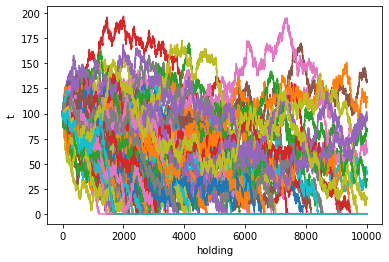

In [94]:
import matplotlib
import matplotlib.pyplot as plt

bets = 10000
betters = 100
for _ in range(betters):
    t = [1.0 * i for i in range(bets + 1)] # + 1 due to initial holding
    h_t = better(100.00, 1.0, bets)

    plt.plot(t, h_t)
    
plt.ylabel("t")
plt.xlabel("holding")
plt.show()

In [89]:
def better_martingale(initial_holding = 100.00, initial_bet = 1.0, rolls = 100):
    holdings_over_time = []
    
    holding = initial_holding
    holdings_over_time.append(holding)
    prev_win = True
    prev_bet = initial_bet
    for _ in range(rolls):
        # bankrupt
        if holding > 0.0:
            bet = prev_bet
            if prev_win == False:
                bet *= 2.0
            winning = rollValue(bet)
            prev_win = winning > 0.0
            holding += winning - bet
            
        holdings_over_time.append(holding)

    return holdings_over_time

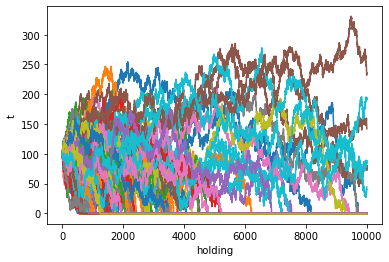

In [96]:
bets = 10000
betters = 100
for _ in range(betters):
    t = [1.0 * i for i in range(bets + 1)] # + 1 due to initial holding
    h_t = better_martingale(100.00, 1.0, bets)

    plt.plot(t, h_t)
    
plt.ylabel("t")
plt.xlabel("holding")
plt.show()